## Non-Negative Matrix Factorization 

- Non-negative Matrix Factorization is an unsupervised algorithm that simultaneously performs dimensionality reduction and clustering 

- We can use with TF-IDF to model topics across documents









we create non-negative matrix A using TF-IDF

In [1]:
# inputs 
# TF-IDF matrix
# number of basis vectors K/number of topics we choose
#  set initial values for w and h mtrices

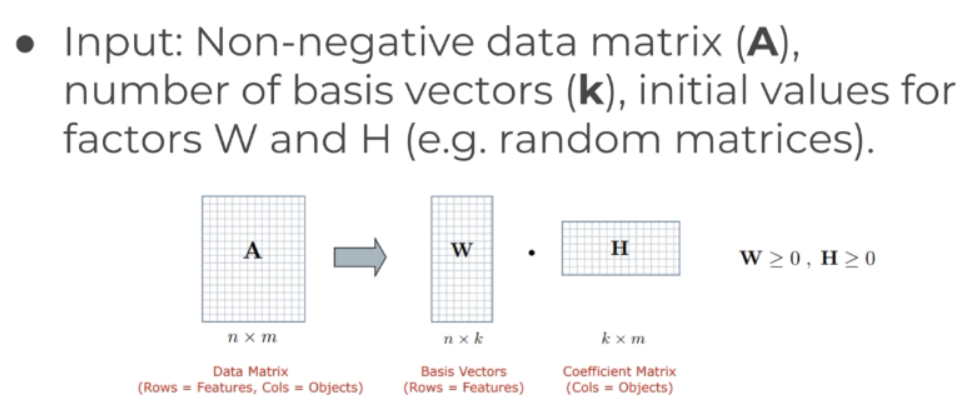

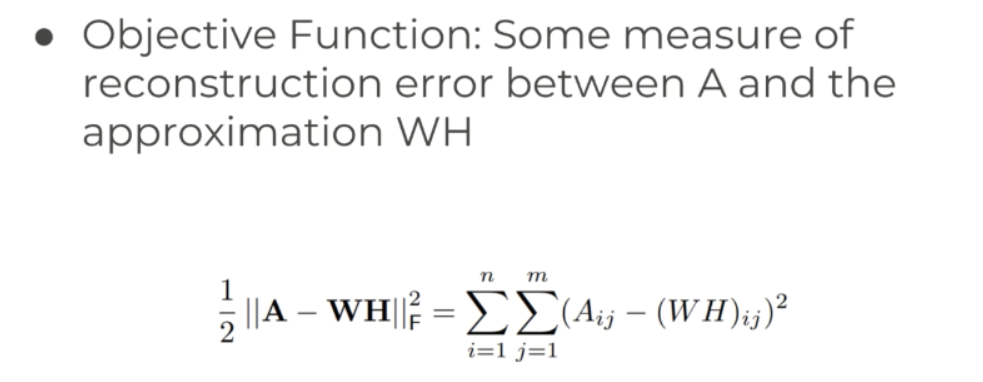

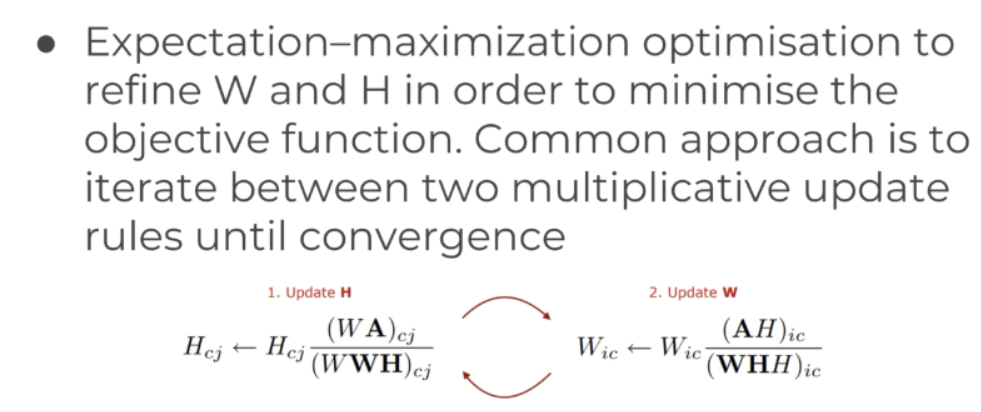

## So our Steps are

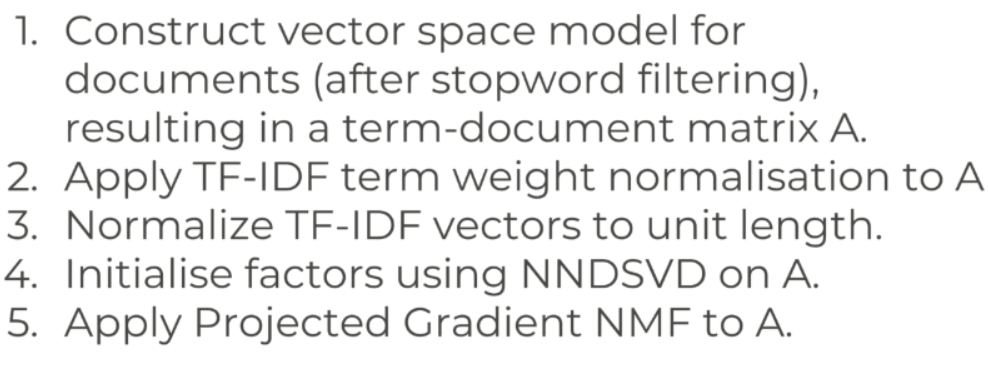

## we end up with the basis vectors  and the coefficient matrix

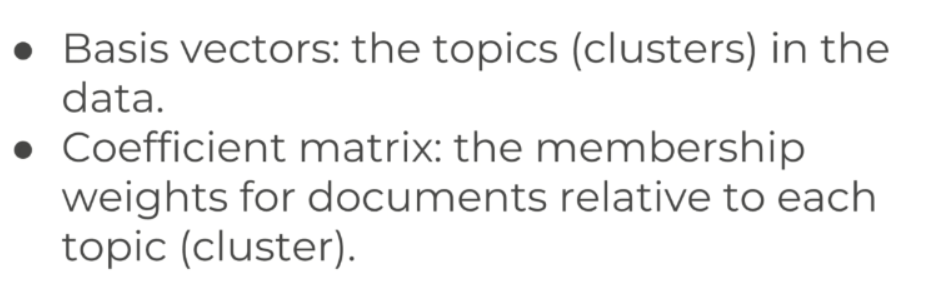

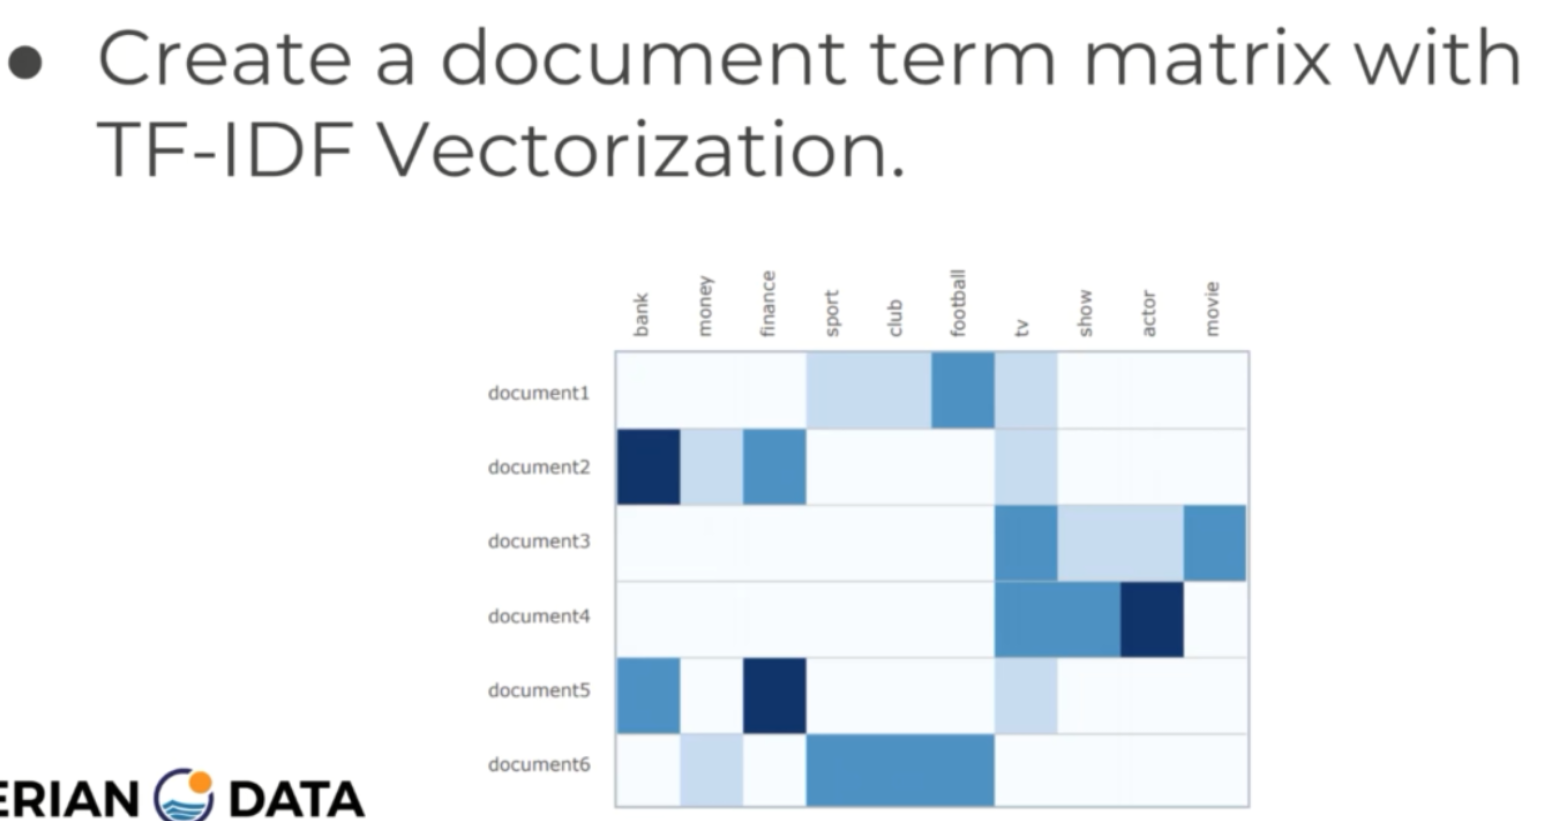

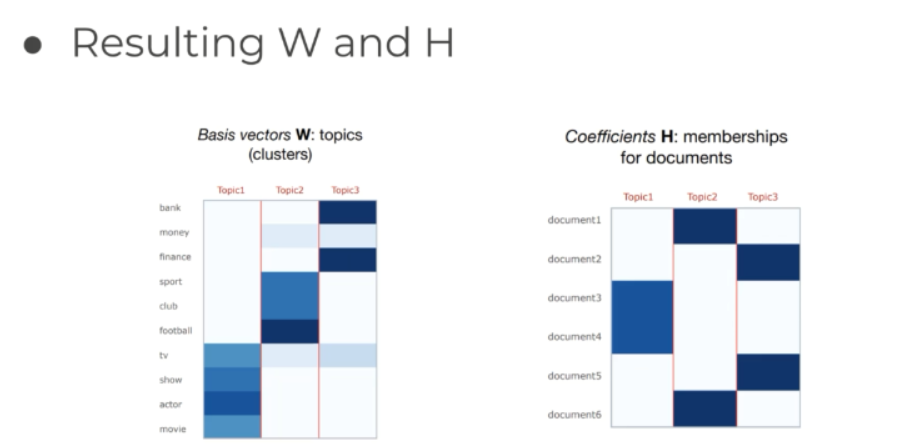

- rows (docs `N`) X columns/features(words `M`)  # this represnets tfidf with intnsity for words relation to docs

- Basis vectors **W** matrix:\
  rows (words `M`) X columns (topics `T`)
  
- Coefficients H: memberships for documents:\
  rows (docs `N`) X columns (topics `T`)
    

# Start Coding 

In [26]:
import pandas as pd
import numpy as np

path=r'npr.csv'
df=pd.read_csv(path)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf=TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')

In [29]:
dtm=tfidf.fit_transform(df['Article'])

In [30]:
pd.DataFrame(dtm.toarray(),columns=tfidf.get_feature_names_out())

,00,000,00000,000s,000th,002,004,007,009,00s,...,zulu,zuma,zumba,zuraw,zurich,zwicky,zydeco,ángel,émigrés,überfunky
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.040775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11987,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11988,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11989,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11990,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3033388 stored elements and shape (11992, 54777)>

In [6]:
from sklearn.decomposition import NMF,non_negative_factorization,MiniBatchNMF

In [7]:
nmf_model=NMF(n_components=7,random_state=42)

In [21]:
W = nmf_model.fit_transform(dtm)

In [31]:
H = nmf_model.components_
H

array([[0.00000000e+00, 2.51270507e-01, 0.00000000e+00, ...,
        1.71376078e-03, 2.39241571e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 8.23172575e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.12287576e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.90615701e-03, 0.00000000e+00, 1.50483058e-03, ...,
        7.06176596e-04, 5.86173445e-04, 6.90910657e-04],
       [4.01955802e-03, 5.31379095e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(7, 54777))

In [33]:
W

array([[0.        , 0.12079566, 0.00139812, ..., 0.01519237, 0.        ,
        0.        ],
       [0.0059807 , 0.12635937, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14152041, 0.        , ..., 0.02265992, 0.        ,
        0.        ],
       ...,
       [0.03170774, 0.        , 0.0084094 , ..., 0.00373091, 0.02436485,
        0.        ],
       [0.        , 0.03797679, 0.01069029, ..., 0.12672486, 0.01175792,
        0.00100378],
       [0.02163313, 0.00645531, 0.00070817, ..., 0.01240273, 0.0127906 ,
        0.00154248]], shape=(11992, 7))

In [8]:
nmf_model.fit(dtm)

NMF(n_components=7, random_state=42)

In [9]:
len(nmf_model.components_)

7

In [10]:
nmf_model.components_.shape

(7, 54777)

In [11]:
tfidf.get_feature_names_out()[2300]

'albala'

In [12]:
for index , topic in enumerate(nmf_model.components_):
    print(f'Topic: {index+1}')
    top_words=topic.argsort()[-15:]
    print(tfidf.get_feature_names_out()[top_words])
    print('\n')

Topic: 1
['new' 'research' 'like' 'patients' 'health' 'disease' 'percent' 'women'
 'virus' 'study' 'water' 'food' 'people' 'zika' 'says']


Topic: 2
['gop' 'pence' 'presidential' 'russia' 'administration' 'election'
 'republican' 'obama' 'white' 'house' 'donald' 'campaign' 'said'
 'president' 'trump']


Topic: 3
['senate' 'house' 'people' 'act' 'law' 'tax' 'plan' 'republicans'
 'affordable' 'obamacare' 'coverage' 'medicaid' 'insurance' 'care'
 'health']


Topic: 4
['officers' 'syria' 'security' 'department' 'law' 'isis' 'russia'
 'government' 'state' 'attack' 'president' 'reports' 'court' 'said'
 'police']


Topic: 5
['primary' 'cruz' 'election' 'democrats' 'percent' 'party' 'delegates'
 'vote' 'state' 'democratic' 'hillary' 'campaign' 'voters' 'sanders'
 'clinton']


Topic: 6
['love' 've' 'don' 'album' 'way' 'time' 'song' 'life' 'really' 'know'
 'people' 'think' 'just' 'music' 'like']


Topic: 7
['teacher' 'state' 'high' 'says' 'parents' 'devos' 'children' 'college'
 'kids' 'teachers'

In [13]:
topic_results=nmf_model.transform(dtm)

In [14]:
topic_results.shape

(11992, 7)

In [15]:
df['Topic']=topic_results.argmax(axis=1)

In [16]:
df

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",3
4,"From photography, illustration and video, to d...",6
...,...,...
11987,The number of law enforcement officers shot an...,3
11988,"Trump is busy these days with victory tours,...",1
11989,It’s always interesting for the Goats and Soda...,0
11990,The election of Donald Trump was a surprise to...,4


In [17]:
my_topics={0:'health',1:'election',2:'legislation',3:'ploitics',4:'election',5:'music',6:'edu'}

In [18]:
df['Topic Label']=df['Topic'].map(my_topics)

In [19]:
df

,Article,Topic,Topic Label
0,"In the Washington of 2016, even when the polic...",1,election
1,Donald Trump has used Twitter — his prefe...,1,election
2,Donald Trump is unabashedly praising Russian...,1,election
3,"Updated at 2:50 p. m. ET, Russian President Vl...",3,ploitics
4,"From photography, illustration and video, to d...",6,edu
...,...,...,...
11987,The number of law enforcement officers shot an...,3,ploitics
11988,"Trump is busy these days with victory tours,...",1,election
11989,It’s always interesting for the Goats and Soda...,0,health
11990,The election of Donald Trump was a surprise to...,4,election
